In [282]:
import pandas as pd  
import numpy as np  
from scipy.stats import uniform  
import statsmodels.api as sm  
import statsmodels.formula.api as smf  
import matplotlib.pyplot as plt  
import seaborn as sns  
from scipy import stats
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

pd.options.display.float_format = '{:,}'.format
pd.set_option('display.float_format', lambda x: '%.5f' % x)

## Load datasets

In [283]:
#Load Coaches9 data
url = 'https://raw.githubusercontent.com/2SUBDA/IST_718/master/Coaches9.csv'
coaches = pd.read_csv(url, error_bad_lines=False)
coaches

,School,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout
0,Air Force,Mt. West,Troy Calhoun,885000,885000,247000,--,$0,--
1,Akron,MAC,Terry Bowden,"$411,000","$412,500","$225,000","$50,000",$0,"$688,500"
2,Alabama,SEC,Nick Saban,"$8,307,000","$8,307,000","$1,100,000","$500,000",$0,"$33,600,000"
3,Alabama at Birmingham,C-USA,Bill Clark,"$900,000","$900,000","$950,000","$165,471",$0,"$3,847,500"
4,Appalachian State,Sun Belt,Scott Satterfield,"$712,500","$712,500","$295,000","$145,000",$0,"$2,160,417"
...,...,...,...,...,...,...,...,...,...
124,West Virginia,Big 12,Dana Holgorsen,"$3,605,000","$3,617,500","$1,000,000","$90,000",$0,"$7,150,000"
125,Western Kentucky,C-USA,Mike Sanford Jr.,"$800,000","$805,850","$400,000",$0,$0,"$1,200,000"
126,Western Michigan,MAC,Tim Lester,"$800,000","$800,000","$346,500","$39,250",$0,"$800,000"
127,Wisconsin,Big Ten,Paul Chryst,"$3,750,000","$3,750,000",--,"$290,000",$0,"$6,000,000"


In [284]:
#load 2019-2020 record data
CollegeRecords = pd.read_csv('CollegeRecords.csv', encoding='ISO-8859–1')
CollegeRecords

,year,School,Conference,division,total.games,total.wins,total.losses,total.ties,conferenceGames.games,conferenceGames.wins,conferenceGames.losses,conferenceGames.ties,homeGames.games,homeGames.wins,homeGames.losses,homeGames.ties,awayGames.games,awayGames.wins,awayGames.losses,awayGames.ties
0,2019,Air Force,Mountain West,Mountain,13,11,2,0,8,7,1,0,6,6,0,0,6,4,2,0
1,2019,Akron,Mid-American,East,12,0,12,0,8,0,8,0,6,0,6,0,6,0,6,0
2,2019,Alabama,SEC,West,13,11,2,0,8,6,2,0,7,6,1,0,4,3,1,0
3,2019,Appalachian State,Sun Belt,NaN,14,13,1,0,9,8,1,0,7,6,1,0,6,6,0,0
4,2019,Arizona,Pac-12,South,12,4,8,0,9,2,7,0,6,3,3,0,6,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,2019,West Virginia,Big 12,NaN,12,5,7,0,9,3,6,0,6,2,4,0,6,3,3,0
126,2019,Western Kentucky,Conference USA,East,13,9,4,0,8,6,2,0,6,4,2,0,5,4,1,0
127,2019,Western Michigan,Mid-American,West,13,7,6,0,8,5,3,0,6,6,0,0,6,1,5,0
128,2019,Wisconsin,Big Ten,West,14,10,4,0,10,7,3,0,7,7,0,0,5,3,2,0


In [285]:
#Replace School names to match Coaches 9 data to allow for merge 
CollegeRecords=CollegeRecords.replace('BYU','Brigham Young')
CollegeRecords=CollegeRecords.replace('Louisiana','Louisiana-Lafayette')
CollegeRecords=CollegeRecords.replace('Louisiana Monroe','Louisiana-Monroe')
CollegeRecords=CollegeRecords.replace('Miami','Miami (Fla.)')
CollegeRecords=CollegeRecords.replace('Miami (OH)','Miami (Ohio)')
CollegeRecords=CollegeRecords.replace('NC State','North Carolina State')
CollegeRecords=CollegeRecords.replace('Ole Miss','Mississippi')
CollegeRecords=CollegeRecords.replace('SMU','Southern Methodist')
CollegeRecords=CollegeRecords.replace('TCU','Texas Christian')
CollegeRecords=CollegeRecords.replace('UAB','Alabama at Birmingham')
CollegeRecords=CollegeRecords.replace('UCF','Central Florida')
CollegeRecords=CollegeRecords.replace('UMass','Massachusetts')
CollegeRecords=CollegeRecords.replace('UNLV','Nevada-Las Vegas')
CollegeRecords=CollegeRecords.replace('USC','Southern California')
CollegeRecords=CollegeRecords.replace('UT San Antonio','Texas-San Antonio')
CollegeRecords=CollegeRecords.replace('UTEP','Texas-El Paso')

In [286]:
#Load Stadiums data
Stadiums = pd.read_csv('Stadiums.csv', encoding='ISO-8859–1')
Stadiums

,Stadium,School,Conference,Capacity,Opened
0,Falcon Stadium,Air Force,Mountain West,"52,237",1962
1,InfoCision Stadium,Akron,MAC,"30,000",2009
2,Bryant Denny Stadium,Alabama,SEC,"101,821",1929
3,Kidd Brewer Stadium,Appalachian State,Sun Belt,"24,150",1962
4,Arizona Stadium,Arizona,Pac 12,"56,037",1928
...,...,...,...,...,...
125,Mountaineer Field,West Virginia,Big 12,"60,000",1980
126,LT Smith Stadium,Western Kentucky,CUSA,"22,113",1968
127,Waldo Stadium,Western Michigan,MAC,"30,200",1939
128,Camp Randall Stadium,Wisconsin,Big Ten,"80,321",1917


In [287]:
#Replace School names to match Coaches 9 data to allow for merge 
Stadiums=Stadiums.replace('BYU','Brigham Young')
Stadiums=Stadiums.replace('Miami','Miami (Fla.)')
Stadiums=Stadiums.replace('Miami-OH','Miami (Ohio)')
Stadiums=Stadiums.replace('NC State','North Carolina State')
Stadiums=Stadiums.replace('SMU','Southern Methodist')
Stadiums=Stadiums.replace('Southern Miss','Southern Mississippi')
Stadiums=Stadiums.replace('TCU','Texas Christian')
Stadiums=Stadiums.replace('UAB','Alabama at Birmingham')
Stadiums=Stadiums.replace('UMass','Massachusetts')
Stadiums=Stadiums.replace('UNC Charlotte','Charlotte')
Stadiums=Stadiums.replace('UNLV','Nevada-Las Vegas')
Stadiums=Stadiums.replace('USC','Southern California')
Stadiums=Stadiums.replace('UTEP','Texas-El Paso')
Stadiums=Stadiums.replace('UTSA','Texas-San Antonio')

In [288]:
#Load GradRates data. Per instructions, the 2006 cohort was extracted from NCAA website
#School names were updated manually
GradRates = pd.read_csv('2006 Graduation Rates.csv', encoding='ISO-8859–1')
GradRates = GradRates.rename(columns={'ï»¿School': 'School'})
GradRates

,School,Conference,Sport,State,GSR,FGR,GSR Report,FGR Report
0,Cincinnati,American Athletic Conference,Football,OH,65,57.00000,nan,nan
1,Connecticut,American Athletic Conference,Football,CT,65,54.00000,nan,nan
2,Louisville,American Athletic Conference,Football,KY,66,49.00000,nan,nan
3,Pittsburgh,American Athletic Conference,Football,PA,68,55.00000,nan,nan
4,Rutgers,American Athletic Conference,Football,NJ,85,66.00000,nan,nan
...,...,...,...,...,...,...,...,...
237,Louisiana Tech,Western Athletic Conference,Football,LA,79,57.00000,nan,nan
238,New Mexico State,Western Athletic Conference,Football,NM,63,44.00000,nan,nan
239,San Jose State,Western Athletic Conference,Football,CA,51,53.00000,nan,nan
240,Texas State,Western Athletic Conference,Football,TX,64,45.00000,nan,nan


In [289]:
#Load 2019 Offense and Defense stats extracted from NCAA website
Offense_Defense = pd.read_csv('Offense_Defense.csv', encoding='ISO-8859–1')
Offense_Defense

,Unnamed: 0,School,G_x,TDs_x,PAT,2PT_x,Def Pts,FG,Saf,Pts_x,PPG,G_y,TDs_y,Opp XP,2PT_y,Opp DXP,Opp FGM,Opp Saf,Pts_y,Avg
0,0,Air Force,13,58,52,1,1,13,0,443,34.10000,13,34,27,0,0,9,0,258,19.80000
1,1,Akron,12,15,13,1,0,7,0,126,10.50000,12,56,55,1,0,14,0,435,36.30000
2,2,Alabama,13,83,80,0,0,12,0,614,47.20000,13,26,22,2,0,20,0,242,18.60000
3,3,Appalachian State,14,73,72,0,0,11,0,543,38.80000,14,35,29,1,0,13,0,280,20.00000
4,4,Arizona,12,42,37,1,0,10,1,323,26.90000,12,54,52,1,0,17,0,429,35.80000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,125,West Virginia,12,30,28,0,0,13,0,247,20.60000,12,43,43,0,0,15,0,346,28.80000
126,126,Western Kentucky,13,40,39,0,0,17,0,330,25.40000,13,32,28,1,0,13,0,261,20.10000
127,127,Western Michigan,13,58,52,0,0,10,0,430,33.10000,13,40,35,1,0,20,0,337,25.90000
128,128,Wisconsin,14,62,61,0,0,14,1,477,34.10000,14,30,25,1,0,10,0,237,16.90000


In [290]:
#Replace School names to match Coaches 9 data to allow for merge 
Offense_Defense=Offense_Defense.replace('Army West Point','Army')
Offense_Defense=Offense_Defense.replace('BYU','Brigham Young')
Offense_Defense=Offense_Defense.replace('Central Mich.','Central Michigan')
Offense_Defense=Offense_Defense.replace('Eastern Mich.','Eastern Michigan')
Offense_Defense=Offense_Defense.replace('FIU','Florida International')
Offense_Defense=Offense_Defense.replace('Fla. Atlantic','Florida Atlantic')
Offense_Defense=Offense_Defense.replace('Ga. Southern','Georgia Southern')
Offense_Defense=Offense_Defense.replace('La.-Monroe','Louisiana-Monroe')
Offense_Defense=Offense_Defense.replace('Louisiana','Louisiana-Lafayette')
Offense_Defense=Offense_Defense.replace('Miami (FL)','Miami (Fla.)')
Offense_Defense=Offense_Defense.replace('Miami (OH)','Miami (Ohio)')
Offense_Defense=Offense_Defense.replace('Middle Tenn.','Middle Tennessee')
Offense_Defense=Offense_Defense.replace('NC S','North Carolina State')
Offense_Defense=Offense_Defense.replace('Northern Ill.','Northern Illinois')
Offense_Defense=Offense_Defense.replace('Ole Miss','Mississippi')
Offense_Defense=Offense_Defense.replace('SMU','Southern Methodist')
Offense_Defense=Offense_Defense.replace('South Fla.','South Florida')
Offense_Defense=Offense_Defense.replace('Southern Miss.','Southern Mississippi')
Offense_Defense=Offense_Defense.replace('Stanford U','Stanford')
Offense_Defense=Offense_Defense.replace('TCU','Texas Christian')
Offense_Defense=Offense_Defense.replace('UAB','Alabama at Birmingham')
Offense_Defense=Offense_Defense.replace('UCF','Central Florida')
Offense_Defense=Offense_Defense.replace('UConn','Connecticut')
Offense_Defense=Offense_Defense.replace('UNLV','Nevada-Las Vegas')
Offense_Defense=Offense_Defense.replace('UTEP','Texas-El Paso')
Offense_Defense=Offense_Defense.replace('UTSA','Texas-San Antonio')               
Offense_Defense=Offense_Defense.replace('Western Ky.','Western Kentucky')
Offense_Defense=Offense_Defense.replace('Western Mich.','Western Michigan')

In [291]:
#merge Coaches9 with CollegeRecords, Stadiums, and GradRates, and Offense/Defense stats
merge=coaches.merge(CollegeRecords, left_on='School',right_on='School')
merge2=merge.merge(Stadiums, left_on='School',right_on='School')
merge3=merge2.merge(GradRates, left_on='School',right_on='School')
data=merge3.merge(Offense_Defense, left_on='School',right_on='School')
data

,School,Conference_x,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout,year,...,PPG,G_y,TDs_y,Opp XP,2PT_y,Opp DXP,Opp FGM,Opp Saf,Pts_y,Avg
0,Air Force,Mt. West,Troy Calhoun,885000,885000,247000,--,$0,--,2019,...,34.10000,13,34,27,0,0,9,0,258,19.80000
1,Akron,MAC,Terry Bowden,"$411,000","$412,500","$225,000","$50,000",$0,"$688,500",2019,...,10.50000,12,56,55,1,0,14,0,435,36.30000
2,Alabama,SEC,Nick Saban,"$8,307,000","$8,307,000","$1,100,000","$500,000",$0,"$33,600,000",2019,...,47.20000,13,26,22,2,0,20,0,242,18.60000
3,Alabama at Birmingham,C-USA,Bill Clark,"$900,000","$900,000","$950,000","$165,471",$0,"$3,847,500",2019,...,23.10000,14,38,33,1,0,13,0,302,21.60000
4,Appalachian State,Sun Belt,Scott Satterfield,"$712,500","$712,500","$295,000","$145,000",$0,"$2,160,417",2019,...,38.80000,14,35,29,1,0,13,0,280,20.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,West Virginia,Big 12,Dana Holgorsen,"$3,605,000","$3,617,500","$1,000,000","$90,000",$0,"$7,150,000",2019,...,20.60000,12,43,43,0,0,15,0,346,28.80000
120,Western Kentucky,C-USA,Mike Sanford Jr.,"$800,000","$805,850","$400,000",$0,$0,"$1,200,000",2019,...,25.40000,13,32,28,1,0,13,0,261,20.10000
121,Western Michigan,MAC,Tim Lester,"$800,000","$800,000","$346,500","$39,250",$0,"$800,000",2019,...,33.10000,13,40,35,1,0,20,0,337,25.90000
122,Wisconsin,Big Ten,Paul Chryst,"$3,750,000","$3,750,000",--,"$290,000",$0,"$6,000,000",2019,...,34.10000,14,30,25,1,0,10,0,237,16.90000


## Cleaning

In [292]:
#Check if data is missing or needs to be fixed to allow for analysis later
data.describe()

,year,total.games,total.wins,total.losses,total.ties,conferenceGames.games,conferenceGames.wins,conferenceGames.losses,conferenceGames.ties,homeGames.games,...,PPG,G_y,TDs_y,Opp XP,2PT_y,Opp DXP,Opp FGM,Opp Saf,Pts_y,Avg
count,124.00000,124.00000,124.00000,124.00000,124.00000,124.00000,124.00000,124.00000,124.00000,124.00000,...,124.00000,124.00000,124.00000,124.00000,124.00000,124.00000,124.00000,124.00000,124.00000,124.00000
mean,2019.00000,12.79032,6.84677,5.94355,0.00000,8.12903,4.08065,4.04839,0.00000,6.38710,...,28.79355,12.79032,42.85484,39.26613,0.99194,0.03226,14.35484,0.21774,341.94355,26.98387
std,0.00000,0.76800,3.16496,2.52887,0.00000,1.77135,2.42479,2.21545,0.00000,0.64656,...,6.98451,0.76800,11.01565,10.98714,1.02407,0.17740,3.96979,0.48658,76.74255,6.84703
min,2019.00000,12.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,5.00000,...,10.50000,12.00000,19.00000,17.00000,0.00000,0.00000,3.00000,0.00000,165.00000,12.60000
25%,2019.00000,12.00000,4.00000,5.00000,0.00000,8.00000,2.00000,2.00000,0.00000,6.00000,...,24.20000,12.00000,35.00000,32.50000,0.00000,0.00000,11.00000,0.00000,289.50000,21.90000
50%,2019.00000,13.00000,7.00000,6.00000,0.00000,8.00000,4.00000,4.00000,0.00000,6.00000,...,29.10000,13.00000,43.00000,38.50000,1.00000,0.00000,14.00000,0.00000,347.50000,27.25000
75%,2019.00000,13.00000,9.00000,8.00000,0.00000,9.00000,6.00000,6.00000,0.00000,7.00000,...,33.10000,13.00000,50.00000,46.25000,2.00000,0.00000,17.00000,0.00000,390.25000,31.80000
max,2019.00000,15.00000,15.00000,12.00000,0.00000,10.00000,10.00000,9.00000,0.00000,8.00000,...,48.40000,15.00000,86.00000,84.00000,4.00000,1.00000,28.00000,2.00000,632.00000,52.70000


In [293]:
#Check data types
print(data.dtypes)

School                     object
Conference_x               object
Coach                      object
SchoolPay                  object
TotalPay                   object
Bonus                      object
BonusPaid                  object
AssistantPay               object
Buyout                     object
year                        int64
Conference_y               object
division                   object
total.games                 int64
total.wins                  int64
total.losses                int64
total.ties                  int64
conferenceGames.games       int64
conferenceGames.wins        int64
conferenceGames.losses      int64
conferenceGames.ties        int64
homeGames.games             int64
homeGames.wins              int64
homeGames.losses            int64
homeGames.ties              int64
awayGames.games             int64
awayGames.wins              int64
awayGames.losses            int64
awayGames.ties              int64
Stadium                    object
Conference_x  

In [294]:
#Check which schools are missing payment information
data.loc[data['SchoolPay']=='--']

,School,Conference_x,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout,year,...,PPG,G_y,TDs_y,Opp XP,2PT_y,Opp DXP,Opp FGM,Opp Saf,Pts_y,Avg
12,Baylor,Big 12,Matt Rhule,--,--,--,--,$0,--,2019,...,33.60000,14,32,28,0,0,19,0,277,19.80000
16,Brigham Young,Ind.,Kalani Sitake,--,--,--,--,$0,--,2019,...,28.50000,13,40,36,2,0,17,0,331,25.50000
88,Rice,C-USA,Mike Bloomgren,--,--,--,--,$0,--,2019,...,17.90000,12,40,36,1,0,11,0,311,25.90000
95,Southern Methodist,AAC,Sonny Dykes,--,--,--,--,$0,--,2019,...,41.80000,13,53,50,2,0,20,1,434,33.40000


In [295]:
#Drop schools with missing payment information
data=data.drop([12,16,84,91],axis=0)

#Remove dollars, commas, and change data types
for i in ['SchoolPay','TotalPay', 'Bonus', 'BonusPaid', 'AssistantPay', 'Buyout', 'Capacity']:
    data[i] = data[i].replace('[$,]', '', regex=True)
    data[i] = data[i].replace('[--]', '0', regex=True)
    data[i] = data[i].astype(float)

In [296]:
#Drop duplicate column
data=data.drop(columns=['Conference_x'])

#Drop columns with unecessary information
data=data.drop(columns=['year','Opened','Sport','State','GSR Report','FGR Report'])


In [297]:
#Remove columns that were duplicate during merge process
data = data.loc[:,~data.columns.duplicated()]

In [298]:
#Rename columns
#Create new column that includes win percentage
data = data.rename(columns={'Conference_y': 'Conference'})
data['Win_Perc'] = data['total.wins'] / data['total.games']

In [299]:
data.describe()

,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout,total.games,total.wins,total.losses,total.ties,...,G_y,TDs_y,Opp XP,2PT_y,Opp DXP,Opp FGM,Opp Saf,Pts_y,Avg,Win_Perc
count,120.00000,120.00000,120.00000,120.00000,120.00000,120.00000,120.00000,120.00000,120.00000,120.00000,...,120.00000,120.00000,120.00000,120.00000,120.00000,120.00000,120.00000,120.00000,120.00000,120.00000
mean,2457965.63333,2465007.35000,760267.19167,109005.31667,0.00000,7139113.93333,12.79167,6.84167,5.95000,0.00000,...,12.79167,42.84167,39.28333,1.00833,0.03333,14.33333,0.20833,341.83333,26.96917,0.52417
std,1907459.46022,1911778.59627,668967.96132,214929.32608,0.00000,10250412.16066,0.76582,3.18609,2.55313,0.00000,...,0.76582,11.10606,11.08878,1.02487,0.18026,3.99229,0.46555,77.57158,6.89540,0.22088
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,12.00000,0.00000,0.00000,0.00000,...,12.00000,19.00000,17.00000,0.00000,0.00000,3.00000,0.00000,165.00000,12.60000,0.00000
25%,807876.00000,808962.50000,249250.00000,0.00000,0.00000,549281.25000,12.00000,4.00000,5.00000,0.00000,...,12.00000,35.00000,32.50000,0.00000,0.00000,11.00000,0.00000,289.50000,21.90000,0.33333
50%,2000000.00000,2000000.00000,675000.00000,25000.00000,0.00000,2951667.00000,13.00000,7.00000,6.00000,0.00000,...,13.00000,43.00000,38.50000,1.00000,0.00000,14.00000,0.00000,347.50000,27.25000,0.53846
75%,3640825.00000,3640825.00000,1058750.00000,106250.00000,0.00000,9468750.25000,13.00000,9.00000,8.00000,0.00000,...,13.00000,50.00000,47.00000,2.00000,0.00000,17.00000,0.00000,391.75000,31.80000,0.64881
max,8307000.00000,8307000.00000,3100000.00000,1350000.00000,0.00000,68125000.00000,15.00000,15.00000,12.00000,0.00000,...,15.00000,86.00000,84.00000,4.00000,1.00000,28.00000,2.00000,632.00000,52.70000,1.00000


# Analysis

Let's take a look at the distribution of salaries across all schools

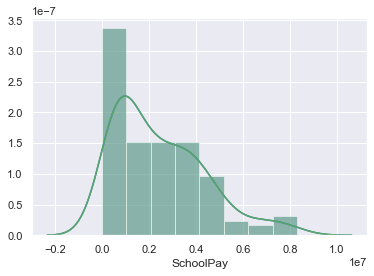

In [672]:
sns.set(); data.SchoolPay
x = data.SchoolPay
ax = sns.distplot(x)
ax = sns.distplot(x, color="g")

Before a model can be created, the variables and their relationships with coach salary will be examined to determine which inputs will be used.

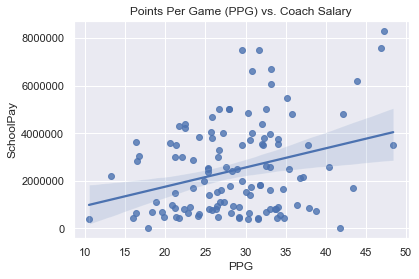

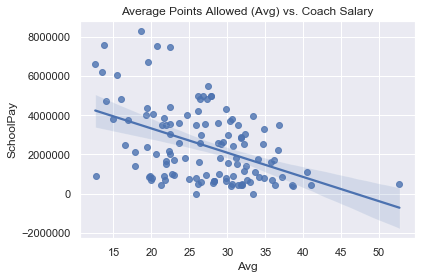

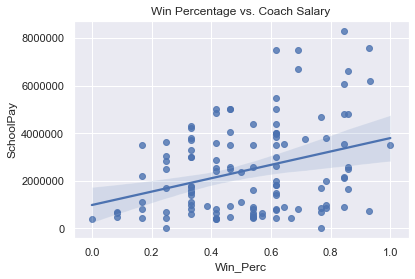

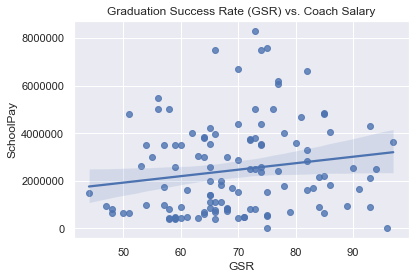

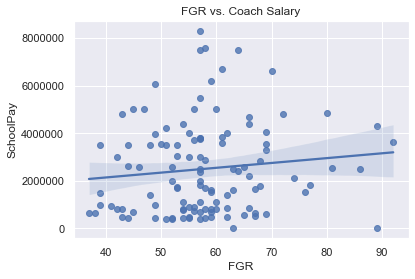

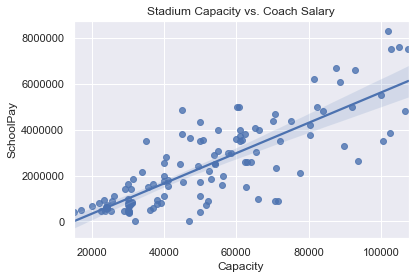

In [301]:
sns.regplot(x="PPG", y="SchoolPay", data=data)
plt.title('Points Per Game (PPG) vs. Coach Salary')
plt.show()


sns.regplot(x="Avg", y="SchoolPay", data=data)
plt.title('Average Points Allowed (Avg) vs. Coach Salary')
plt.show()

sns.regplot(x="Win_Perc", y="SchoolPay", data=data)
plt.title('Win Percentage vs. Coach Salary')
plt.show()

sns.regplot(x="GSR", y="SchoolPay", data=data)
plt.title('Graduation Success Rate (GSR) vs. Coach Salary')
plt.show()

sns.regplot(x="FGR", y="SchoolPay", data=data)
plt.title('FGR vs. Coach Salary')
plt.show()

sns.regplot(x="Capacity", y="SchoolPay", data=data)
plt.title('Stadium Capacity vs. Coach Salary')
plt.show()

There is a positive relationship between coach calary and PPG, win percentage, and stadium capacity. There is a slightly positive relationship between coach salary and GSR, but not quite as pronounced as the previous variables. As one would expect, there is a negative relationship between coach salary and average points allowed.

Lastly, let's take a look at the difference between conferences.

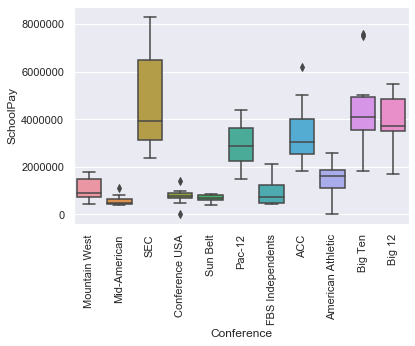

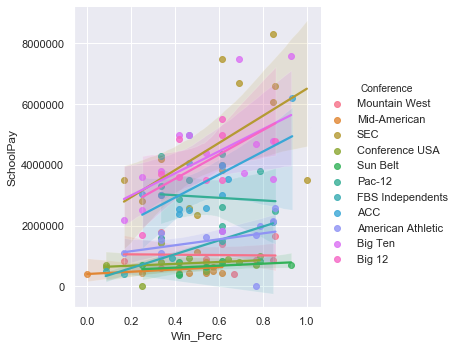

In [302]:
chart = sns.boxplot(x="Conference", y="SchoolPay", data=data)
for item in chart.get_xticklabels():
    item.set_rotation(90)
plt.show()

sns.lmplot(x="Win_Perc", y="SchoolPay", hue="Conference", data=data)
plt.show()

Clearly, salaries in the SEC are higher when compared to other conferences. Mountain West, Mid-American, Conference USA, and Sun Belt have similarly smaller salaries when compared to other conferences.

We also see again that salaries tend to increase when compared to win percentage, and we see that schools that are both in the SEC and the highest win percentages have the highest salaries in the data set. 

In [303]:
data

,School,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout,Conference,division,...,G_y,TDs_y,Opp XP,2PT_y,Opp DXP,Opp FGM,Opp Saf,Pts_y,Avg,Win_Perc
0,Air Force,Troy Calhoun,885000.00000,885000.00000,247000.00000,0.00000,0.00000,0.00000,Mountain West,Mountain,...,13,34,27,0,0,9,0,258,19.80000,0.84615
1,Akron,Terry Bowden,411000.00000,412500.00000,225000.00000,50000.00000,0.00000,688500.00000,Mid-American,East,...,12,56,55,1,0,14,0,435,36.30000,0.00000
2,Alabama,Nick Saban,8307000.00000,8307000.00000,1100000.00000,500000.00000,0.00000,33600000.00000,SEC,West,...,13,26,22,2,0,20,0,242,18.60000,0.84615
3,Alabama at Birmingham,Bill Clark,900000.00000,900000.00000,950000.00000,165471.00000,0.00000,3847500.00000,Conference USA,West,...,14,38,33,1,0,13,0,302,21.60000,0.64286
4,Appalachian State,Scott Satterfield,712500.00000,712500.00000,295000.00000,145000.00000,0.00000,2160417.00000,Sun Belt,NaN,...,14,35,29,1,0,13,0,280,20.00000,0.92857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,West Virginia,Dana Holgorsen,3605000.00000,3617500.00000,1000000.00000,90000.00000,0.00000,7150000.00000,Big 12,NaN,...,12,43,43,0,0,15,0,346,28.80000,0.41667
120,Western Kentucky,Mike Sanford Jr.,800000.00000,805850.00000,400000.00000,0.00000,0.00000,1200000.00000,Conference USA,East,...,13,32,28,1,0,13,0,261,20.10000,0.69231
121,Western Michigan,Tim Lester,800000.00000,800000.00000,346500.00000,39250.00000,0.00000,800000.00000,Mid-American,West,...,13,40,35,1,0,20,0,337,25.90000,0.53846
122,Wisconsin,Paul Chryst,3750000.00000,3750000.00000,0.00000,290000.00000,0.00000,6000000.00000,Big Ten,West,...,14,30,25,1,0,10,0,237,16.90000,0.71429


# Model 1

In [503]:
features = ['School','PPG','Avg','Win_Perc','GSR', 'Capacity','Conference','SchoolPay']
dataModel= data[features]
dataModel

,School,PPG,Avg,Win_Perc,GSR,Capacity,Conference,SchoolPay
0,Air Force,34.10000,19.80000,0.84615,93,52237.00000,Mountain West,885000.00000
1,Akron,10.50000,36.30000,0.00000,58,30000.00000,Mid-American,411000.00000
2,Alabama,47.20000,18.60000,0.84615,73,101821.00000,SEC,8307000.00000
3,Alabama at Birmingham,23.10000,21.60000,0.64286,60,71594.00000,Conference USA,900000.00000
4,Appalachian State,38.80000,20.00000,0.92857,68,24150.00000,Sun Belt,712500.00000
...,...,...,...,...,...,...,...,...
119,West Virginia,20.60000,28.80000,0.41667,80,60000.00000,Big 12,3605000.00000
120,Western Kentucky,25.40000,20.10000,0.69231,72,22113.00000,Conference USA,800000.00000
121,Western Michigan,33.10000,25.90000,0.53846,68,30200.00000,Mid-American,800000.00000
122,Wisconsin,34.10000,16.90000,0.71429,72,80321.00000,Big Ten,3750000.00000


In [504]:
#Create dummy variables for conferences to allow for regression analysis
dataModel = pd.get_dummies(dataModel, columns=['Conference'])
dataModel

,School,PPG,Avg,Win_Perc,GSR,Capacity,SchoolPay,Conference_ACC,Conference_American Athletic,Conference_Big 12,Conference_Big Ten,Conference_Conference USA,Conference_FBS Independents,Conference_Mid-American,Conference_Mountain West,Conference_Pac-12,Conference_SEC,Conference_Sun Belt
0,Air Force,34.10000,19.80000,0.84615,93,52237.00000,885000.00000,0,0,0,0,0,0,0,1,0,0,0
1,Akron,10.50000,36.30000,0.00000,58,30000.00000,411000.00000,0,0,0,0,0,0,1,0,0,0,0
2,Alabama,47.20000,18.60000,0.84615,73,101821.00000,8307000.00000,0,0,0,0,0,0,0,0,0,1,0
3,Alabama at Birmingham,23.10000,21.60000,0.64286,60,71594.00000,900000.00000,0,0,0,0,1,0,0,0,0,0,0
4,Appalachian State,38.80000,20.00000,0.92857,68,24150.00000,712500.00000,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,West Virginia,20.60000,28.80000,0.41667,80,60000.00000,3605000.00000,0,0,1,0,0,0,0,0,0,0,0
120,Western Kentucky,25.40000,20.10000,0.69231,72,22113.00000,800000.00000,0,0,0,0,1,0,0,0,0,0,0
121,Western Michigan,33.10000,25.90000,0.53846,68,30200.00000,800000.00000,0,0,0,0,0,0,1,0,0,0,0
122,Wisconsin,34.10000,16.90000,0.71429,72,80321.00000,3750000.00000,0,0,0,1,0,0,0,0,0,0,0


In [505]:
#Rename conference columns
dataModel=dataModel.rename(columns={"Conference_ACC": "ACC", "Conference_American Athletic": "AAC",
                          "Conference_Big 12": "Big12", "Conference_Big Ten": "Big10",
                          "Conference_Conference USA": "CUSA", "Conference_FBS Independents": "Independents",
                          "Conference_Mid-American": "MidAmerican", "Conference_Mountain West": "MountainWest",
                             "Conference_Pac-12": "Pac12", "Conference_SEC": "SEC",
                             "Conference_Sun Belt": "SunBelt",
                                    
                                   })
dataModel

,School,PPG,Avg,Win_Perc,GSR,Capacity,SchoolPay,ACC,AAC,Big12,Big10,CUSA,Independents,MidAmerican,MountainWest,Pac12,SEC,SunBelt
0,Air Force,34.10000,19.80000,0.84615,93,52237.00000,885000.00000,0,0,0,0,0,0,0,1,0,0,0
1,Akron,10.50000,36.30000,0.00000,58,30000.00000,411000.00000,0,0,0,0,0,0,1,0,0,0,0
2,Alabama,47.20000,18.60000,0.84615,73,101821.00000,8307000.00000,0,0,0,0,0,0,0,0,0,1,0
3,Alabama at Birmingham,23.10000,21.60000,0.64286,60,71594.00000,900000.00000,0,0,0,0,1,0,0,0,0,0,0
4,Appalachian State,38.80000,20.00000,0.92857,68,24150.00000,712500.00000,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,West Virginia,20.60000,28.80000,0.41667,80,60000.00000,3605000.00000,0,0,1,0,0,0,0,0,0,0,0
120,Western Kentucky,25.40000,20.10000,0.69231,72,22113.00000,800000.00000,0,0,0,0,1,0,0,0,0,0,0
121,Western Michigan,33.10000,25.90000,0.53846,68,30200.00000,800000.00000,0,0,0,0,0,0,1,0,0,0,0
122,Wisconsin,34.10000,16.90000,0.71429,72,80321.00000,3750000.00000,0,0,0,1,0,0,0,0,0,0,0


In [507]:
#Create linear model
lm = my_model = smf.ols('SchoolPay ~ PPG + Avg + Win_Perc + GSR + Capacity + ACC + AAC + Big12 + Big10 + CUSA + Independents + MidAmerican + MountainWest + Pac12 + SEC + SunBelt', data = dataModel).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SchoolPay   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     29.99
Date:                Fri, 24 Jul 2020   Prob (F-statistic):           5.39e-31
Time:                        18:28:00   Log-Likelihood:                -1804.8
No. Observations:                 120   AIC:                             3642.
Df Residuals:                     104   BIC:                             3686.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     6.027e+05   1.07e+06      0.562   

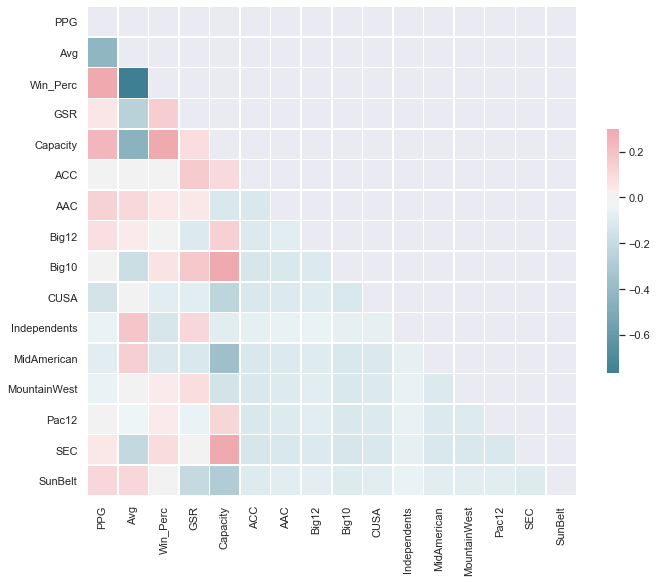

In [509]:
#test for multicolinearity
C_Variables = ['PPG','Avg', 'Win_Perc','GSR', 'Capacity','ACC','AAC',
          'Big12','Big10','CUSA', 'Independents','MidAmerican','MountainWest','Pac12','SEC','SunBelt']
Corr = dataModel[C_Variables]
corr = Corr.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [674]:
#Create another linear model 
lm = my_model = smf.ols('SchoolPay ~ PPG + GSR + Avg + Capacity + ACC + AAC + Big12 + Big10 + CUSA + Independents + MidAmerican + MountainWest + Pac12 + SEC + SunBelt', data = dataModel).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SchoolPay   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     31.18
Date:                Fri, 24 Jul 2020   Prob (F-statistic):           4.79e-31
Time:                        20:28:22   Log-Likelihood:                -1806.7
No. Observations:                 120   AIC:                             3643.
Df Residuals:                     105   BIC:                             3685.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -2.747e+05   9.71e+05     -0.283   

# Model 2

In [649]:
#Build train and test datasets
inputs = ['PPG','Avg','GSR', 'Capacity','ACC','AAC',
          'Big12','Big10','CUSA', 'Independents','MidAmerican','MountainWest','Pac12','SEC','SunBelt']
output = ['SchoolPay']

xtrain, xtest, ytrain, ytest = train_test_split(dataModel[inputs], dataModel[output], test_size=0.3)

In [650]:
#Build model
regr = linear_model.LinearRegression()
model = regr.fit(xtrain, ytrain)
salary_pred = regr.predict(xtest)

In [651]:
#Print results
print('Coefficients: \n', regr.coef_)
print('Mean squared error: %.2f'
      % mean_squared_error(ytest, salary_pred))
print('Coefficient of determination: %.2f'
      % r2_score(ytest, salary_pred))
print('Model 2 R-squared: ', model.score(xtrain, ytrain))

Coefficients: 
 [[ 3.02941838e+04 -2.94258090e+04  2.43299773e+03  3.76225100e+01
   7.67176295e+05 -5.69623866e+05  9.73163955e+05  1.44033574e+06
  -8.61329999e+05 -1.11667077e+06 -5.72914929e+05 -1.03386324e+06
   2.25393007e+05  1.49528411e+06 -7.46950302e+05]]
Mean squared error: 1334590637942.54
Coefficient of determination: 0.62
Model 2 R-squared:  0.8551308732519276


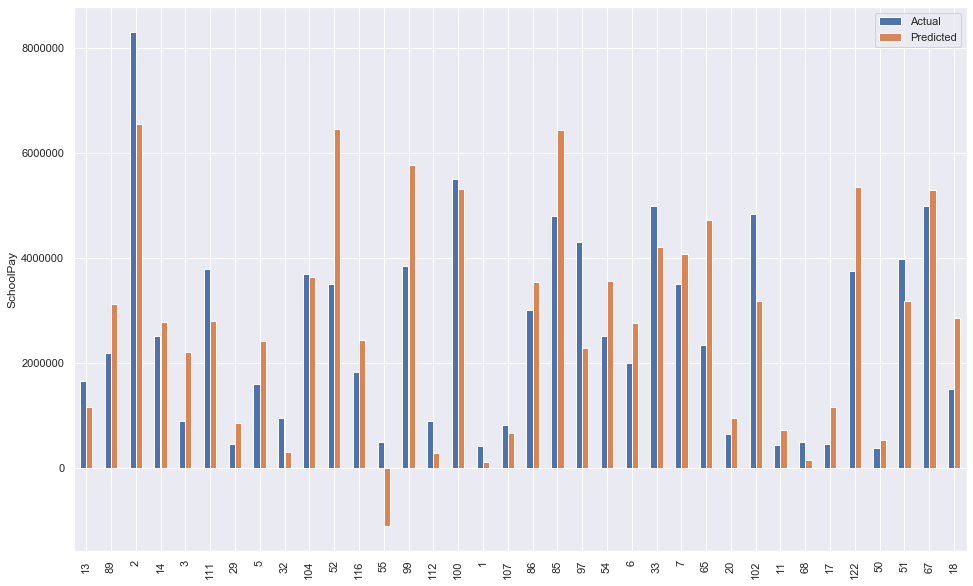

In [664]:
#Graph actual vs. predicted values
df = ytest
df['test'] = salary_pred
df = df.rename(columns={'SchoolPay': 'Actual'})
df.rename(columns={ df.columns[1]: 'Predicted' }, inplace = True)

df.plot(kind='bar',figsize=(16,10))
plt.ylabel('SchoolPay')
plt.show()

In [665]:
#Predict salary for Syracuse coach
Syracuse = dataModel[dataModel['School']=='Syracuse']
SyracuseTest = Syracuse[inputs]
SyracuseTest

,PPG,Avg,GSR,Capacity,ACC,AAC,Big12,Big10,CUSA,Independents,MidAmerican,MountainWest,Pac12,SEC,SunBelt
98,28.30000,30.70000,77,49250.00000,1,0,0,0,0,0,0,0,0,0,0


In [666]:
#Predict salary for Syracuse coach
Syracuse_Pred = regr.predict(SyracuseTest)
Syracuse_Pred

array([[2934224.45727419]])

In [667]:
#Predict salary if Syracuse was independent 
SyracuseTestBigEast = SyracuseTest
SyracuseTestBigEast.loc[:, 'Independents'] = 1
SyracuseTestBigEast.loc[:, 'ACC'] = 0
SyracuseTestBigEast

C:\Users\Joe\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,PPG,Avg,GSR,Capacity,ACC,AAC,Big12,Big10,CUSA,Independents,MidAmerican,MountainWest,Pac12,SEC,SunBelt
98,28.30000,30.70000,77,49250.00000,0,0,0,0,0,1,0,0,0,0,0


In [656]:
regr.predict(SyracuseTestBigEast)

array([[1050377.39143899]])

In [657]:
#Predict salary if Syracuse was in the Big10 
SyracuseTest10 = SyracuseTest
SyracuseTest10.loc[:, 'Big10'] = 1
SyracuseTest10.loc[:, 'Independents'] = 0
SyracuseTest10.loc[:, 'ACC'] = 0
SyracuseTest10

C:\Users\Joe\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,PPG,Avg,GSR,Capacity,ACC,AAC,Big12,Big10,CUSA,Independents,MidAmerican,MountainWest,Pac12,SEC,SunBelt
98,28.30000,30.70000,77,49250.00000,0,0,0,1,0,0,0,0,0,0,0


In [658]:
regr.predict(SyracuseTest10)

array([[3607383.90461351]])

# Compare Syracuse to Other Schools

In [174]:
summary = dataModel[inputs].describe()
summary['SchoolPay'] = dataModel[output].describe()
summary

,PPG,Avg,Win_Perc,GSR,Capacity,Conference,SchoolPay
count,120.00000,120.00000,120.00000,120.00000,120.00000,120.00000,120.00000
mean,28.72500,26.96917,0.52417,69.61667,52130.40000,4.85000,2457965.63333
std,7.08241,6.89540,0.22088,11.54762,23480.78256,3.24270,1907459.46022
min,10.50000,12.60000,0.00000,44.00000,15000.00000,0.00000,0.00000
25%,24.17500,21.90000,0.33333,61.00000,30935.50000,2.00000,807876.00000
50%,28.75000,27.25000,0.53846,68.00000,50000.00000,4.50000,2000000.00000
75%,33.10000,31.80000,0.64881,76.25000,65302.00000,8.00000,3640825.00000
max,48.40000,52.70000,1.00000,97.00000,107601.00000,10.00000,8307000.00000


In [170]:
Syracuse[inputs]

,PPG,Avg,Win_Perc,GSR,Capacity,Conference
98,28.30000,30.70000,0.41667,77,49250.00000,0


In [175]:
Syracuse[output]

,SchoolPay
98,2401206.00000
